In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = pd.read_csv("dataset.csv")

data.head()
print(data.shape)


(303, 14)


In [17]:
x = data[data.columns[:13]] 
y = data[data.columns[-1]] 
#print(x[:5])
#print(y)

In [18]:

x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

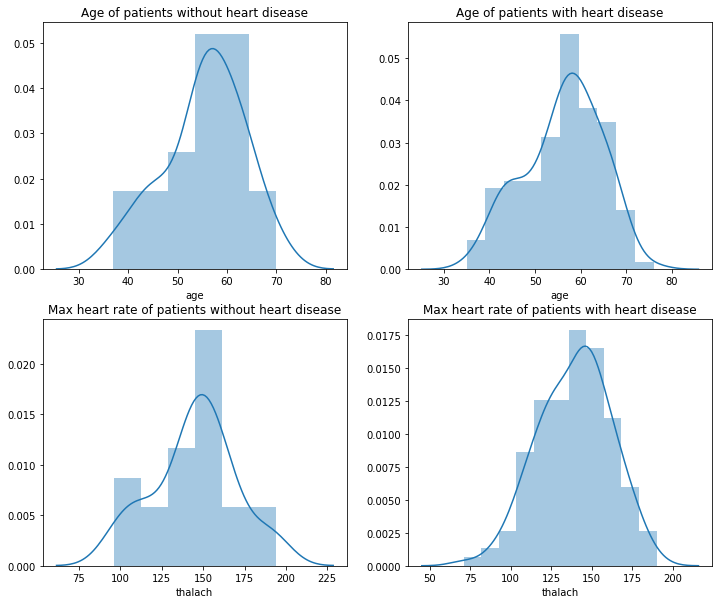

In [33]:
plt.figure(figsize=(12,10))
plt.subplot(221)
#print((data[data['slope']==0].age))
sns.distplot(data[data['slope']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(data[data['slope']==1].age)
#print((data[data['slope']==1].age))
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(data[data['slope']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(data[data['slope']==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()


Age distribution of healthy patients is much wider than ill people. The latter are at the highest risk in their sixties. 
Max heart rate distribution does not differ as much, but the risk peaks when max_heart_rate value is between 150 and 170.
Higher values are more common for well patients.

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1) 
 
print(X_train.shape) 
print(X_test.shape) 
  
print(y_train.shape)

print(y_test.shape)

(272, 13)
(31, 13)
(272,)
(31,)


KNN


In [11]:
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 27) 
  
knn.fit(X_train, y_train)

pred = knn.predict(X_test) 

print(pred)


from sklearn import metrics 
print("accuracy:", metrics.accuracy_score(y_test, pred)*100) 


[1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1]
accuracy: 67.74193548387096


LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()
logi.fit(X_train, y_train)

predict = logi.predict(X_test) 

print(predict)


print(" accuracy:", metrics.accuracy_score(y_test, predict)*100) 

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1]
 accuracy: 87.09677419354838


C:\Users\Ataur Rahman Selim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DECISION TREE

In [13]:
from sklearn.tree import DecisionTreeClassifier
deci=DecisionTreeClassifier()
deci.fit(X_train, y_train)
predi = deci.predict(X_test)
print(predi)

print(" accuracy:", metrics.accuracy_score(y_test, predi)*100) 

[0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1]
 accuracy: 80.64516129032258
